In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
# Read input file
initialState = np.loadtxt("initialStateDistribution.txt")
observations = np.loadtxt("observations.txt")
transition = np.loadtxt("transitionMatrix.txt")
emission = np.loadtxt("emissionMatrix.txt")

# Change from type float64 to int
observations = observations.astype(int)

print(initialState.shape)
print(observations.shape)
print(transition.shape)
print(emission.shape)

(27,)
(55000,)
(27, 27)
(27, 2)


In [3]:
# Setup parameters
n = 27    # number of hidden states from {1,2,...,27}
m = 2     # number of observation states from {1,2}
T = 55000 # number of observations

In [10]:
# Alphabet dict
alphaDict = dict(zip(range(1,28), string.ascii_lowercase + ' '))

# Matrix l* (nxT) for recursion
l = np.empty([n,T])
print(l.shape)

# Initialize first column of l*
# i.e. (i) base case => l* = log pie i + log bi(o1)
l[:,0] = np.log(initialState) + np.log(emission[:, observations[0]])

# Matrix Phi (nxT)
phi = np.empty([n,T])
print(phi.shape)

# Initialize first column of Phi
phi[:,0] = initialState

# Initialize s* sequence for Vierbi path
s = np.full(T, -1, dtype=int)

(27, 55000)
(27, 55000)


In [11]:
# update l* and phi, i.e. l*_(j,t+1) and phi_(j,t+1)
def update(row, col):
    # row = j, col = current time t+1, col-1 = previous time t
    state_transitions = l[:,col-1] + np.log(transition[:,row])

    # update l*
    next_l = np.amax(state_transitions) + np.log(emission[row, observations[col]])
    
    # update phi, which store the index of i which maximize the state_transitions
    most_likely = int(np.argmax(state_transitions))
    
    return most_likely, next_l

# backtrack to compute s* = {s1*, s2*, ..., sT*}
def backtrack(t_idx):
    if t_idx == T-1:
        # Find the maximum in the last column
        return int(np.argmax(l[:,T-1]))
    else:
        # Return st* for t in T
        return int(np.argmax(l[:,t_idx] + np.log(transition[:,s[t_idx+1]])))
    
# backtrack to compute s* = {s1*, s2*, ..., sT*}
def fastBacktracking(t_idx):
    if t_idx == T-1:
        # Find the maximum in the last column
        return int(np.argmax(l[:,T-1]))
    else:
        # Return st* for t in T
        return phi[s[t_idx+1], t_idx+1]

# Run the Viterbi algorithm
def Viterbi():
    # forward algorithm - filling Phi and l* matrices
    for t in range(T-1):
        for j in range(n):
            
            # Update matrices of t=t+1
            phi[j,t+1], l[j,t+1] = update(j,t+1)

    # backtrack from t=T-1 to t=0
    for t in range(T-1,-1,-1):
        #s[t] = int(backtrack(t))
        s[t] = int(fastBacktracking(t))

# Plot most likely hidden states versus time
def plot_HMM():
    plt.plot(s)
    plt.title('Most likely sequence of hidden states versus time')
    plt.xlabel('time (t)')
    plt.ylabel('Hidden states (s_t)')

# Decode hidden message
def decode():
    message = []
    for t in range(T-1):
        if s[t] != s[t+1]:
            message.append(alphaDict.get(s[t]+1))
    message.append(alphaDict.get(s[T-1]+1))
    return ''.join(message)

In [12]:
Viterbi()

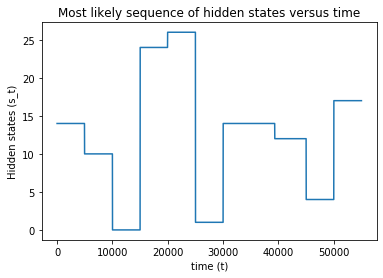

In [13]:
plot_HMM()

In [14]:
hidden_message = decode()
print(hidden_message)

okay bomer
